<a href="https://colab.research.google.com/github/Camilacruzdepaula/miner-a/blob/master/miner%C3%ADa_proy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
Procesamiento de Lenguaje Natural


In [0]:
# Configuración

In [0]:
#Ingresar a la API de Genius
!pip install nltk
import nltk
!pip install lyricsgenius #así se instala en colab
!pip install jsonmerge
import lyricsgenius
#api = lyricsgenius.Genius("c43DQ0EFHhInkV4Xw389hB7EKeGNhwQDOehiwWHVaQnAEcvSdxIOdcA1JnJbtb4N")
genius = lyricsgenius.Genius("c43DQ0EFHhInkV4Xw389hB7EKeGNhwQDOehiwWHVaQnAEcvSdxIOdcA1JnJbtb4N")

In [0]:
#Descargar canciones
artist_name = ["Sanalejo"]
cantidad=len(artist_name)
listaart=[""]*cantidad

genius = lyricsgenius.Genius("c43DQ0EFHhInkV4Xw389hB7EKeGNhwQDOehiwWHVaQnAEcvSdxIOdcA1JnJbtb4N")
genius.remove_section_headers
genius.skip_non_songs 
genius.excluded_terms = [" (En Vivo)", " (Live)"," (Remix)","Lay Your Head On Me"]
for elt_id,elt in enumerate(artist_name):
  listaart[elt_id]=genius.search_artist(artist_name[elt_id], max_songs=1)
  listaart[elt_id].save_lyrics(extension='json')
  import pandas as pd
import json

In [0]:
import pandas as pd
import json
artist_name = ["Sanalejo", 'Juanes','ManuelMedrano', 'AndrésCepeda']

In [0]:
data=[]
cantidad=len(artist_name)
listaart=[""]*cantidad
for i in range(len(artist_name)):
  with open('Lyrics_'+artist_name[i]+'.json') as json_data:
    data.append(json.load(json_data))
data_s=[ pd.DataFrame(dicc['songs']).lyrics for dicc in data]

#dataf=dataf.lyrics
# dataf
#data_s[1][99]

In [0]:
texto=''
for artist in data_s:
  for cancion in artist:
    texto += cancion
#dataf= dataf.str.lower()
#texto =''
#for listitem in data_s:
 #   texto += listitem # Acá se unen todas las canciones
import re
replace= [(r'\[.*\]', ''),
          (r'\(.*\)', '')]

for old, new in replace:
    texto = re.sub(old, new, texto)

In [0]:
texto=texto.replace("\n"," ").replace("\'","")
texto

'Trato de dejarte congelada en un recuerdo que termina helándome Tal vez son las cicatrices la bitácora reciente hasta ahora Sin darme cuenta te materializo en frases sueltas que terminan ahogándome Porque tu espíritu indeleble ha dejado mi memoria manchada A pesar de tanto luchar es tu recuerdo el que llega primero Incondicional me hace saber que todavía te espero  Ante mi incrédula mirada castigaron mi egoísmo reincidente Al verme solo al espejo me doy cuenta que me he desvanecido Las veces que experimente tu corazón en furia ha sido de ganas Me deje vencer y ahora el agua nunca encuentra la calma  Hoy trato de sacar lo mucho que dejaste acá daentro tuyo Hay duele la verdad como una enfermedad incurable Hoy voy a reclamarle al tiempo el pedazo de mí que ha muerto Hay no estuvo de mas querer para entender que se paga un precio  Ante mi incrédula mirada castigaron mi egoísmo reincidente Al verme solo al espejo me doy cuenta que me he desvanecido Todo fue como irme sumergiendo lentament

In [0]:
texto=texto.lower()
print("tamaño del texto",len(texto))
texto

tamaño del texto 319018


'trato de dejarte congelada en un recuerdo que termina helándome tal vez son las cicatrices la bitácora reciente hasta ahora sin darme cuenta te materializo en frases sueltas que terminan ahogándome porque tu espíritu indeleble ha dejado mi memoria manchada a pesar de tanto luchar es tu recuerdo el que llega primero incondicional me hace saber que todavía te espero  ante mi incrédula mirada castigaron mi egoísmo reincidente al verme solo al espejo me doy cuenta que me he desvanecido las veces que experimente tu corazón en furia ha sido de ganas me deje vencer y ahora el agua nunca encuentra la calma  hoy trato de sacar lo mucho que dejaste acá daentro tuyo hay duele la verdad como una enfermedad incurable hoy voy a reclamarle al tiempo el pedazo de mí que ha muerto hay no estuvo de mas querer para entender que se paga un precio  ante mi incrédula mirada castigaron mi egoísmo reincidente al verme solo al espejo me doy cuenta que me he desvanecido todo fue como irme sumergiendo lentament

In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Conv1D,  GlobalMaxPooling1D
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, Lambda
from tensorflow.keras.layers import Reshape, Activation
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras import regularizers

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras import backend as K

In [0]:
import numpy as np
import matplotlib.pyplot as plt

#import json
#import tensorflow as tf

# Pre-procesamiento.. forma profe


In [0]:
# For Juypter, download the file from the URL
#!wget --no-check-certificate \
#    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
#    -O /tmp/sonnets.txt
data = texto

In [0]:
tokenizer = Tokenizer()
corpus = data.lower().split("\n")
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = to_categorical(label, num_classes=total_words)

In [0]:
predictors.shape

(345, 345)

# Nuestra forma

In [0]:
texto
text = texto.split()
n = 20
corpus=[' '.join(text[i:i+n]) for i in range(0,len(text),n)]

In [0]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

In [0]:
# create input sequences using list of tokens
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = to_categorical(label, num_classes=total_words)

In [0]:
predictors.shape

(34723, 39)

# Model usando API Funcional de keras


In [0]:
# setting
shape = [1,max_sequence_len-1]
#input_length=max_length-1
filters = 128
kernel_size = 5
b_lstm_units = 150
lstm_units = 100
drop_out = 0.2
alpha_regularizer = 1e-4
alpha_regularizer_act = 1e-5
embedding_dim = 100
temp=2

# model
inputs = Input(shape=shape, name='nlp')
x = inputs
x = Embedding(total_words, embedding_dim, input_length=max_sequence_len-1, name='embedding')(x)
x = Reshape([shape[1],embedding_dim])(x)
print (K.shape(x))
x = Activation('relu')(x)
x = Bidirectional(LSTM(b_lstm_units, return_sequences = True))(x)
x = Dropout(drop_out)(x)
x = LSTM(lstm_units)(x)
x = Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(alpha_regularizer),
    bias_regularizer=regularizers.l2(alpha_regularizer),
    activity_regularizer=regularizers.l2(alpha_regularizer_act))(x)
x = Lambda(lambda x: x / temp)(x)
output = Dense(total_words,activation='softmax')(x)

model = Model(inputs, output, name='nlp_am')
#model.summary()
#plot_model(model,
          # to_file='nlp.png',
           #show_shapes=True)    

Tensor("Shape_7:0", shape=(3,), dtype=int32)


In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#print(model.summary())

In [0]:
num_epochs = 100
x_train = predictors.reshape([predictors.shape[0], 1,predictors.shape[1]])
#x_train.shape
#label.shape

In [0]:
history = model.fit(x_train, label, epochs=num_epochs,  verbose=1)

Epoch 1/100
1889/1889 [==============================] - 111s 59ms/step - loss: 6.2431 - accuracy: 0.0504
Epoch 2/100
1889/1889 [==============================] - 111s 59ms/step - loss: 5.8724 - accuracy: 0.0568
Epoch 3/100
1889/1889 [==============================] - 111s 59ms/step - loss: 5.5878 - accuracy: 0.0744
Epoch 4/100
1889/1889 [==============================] - 111s 59ms/step - loss: 5.3236 - accuracy: 0.0926
Epoch 5/100
1889/1889 [==============================] - 111s 59ms/step - loss: 5.0845 - accuracy: 0.1119
Epoch 6/100
1889/1889 [==============================] - 111s 59ms/step - loss: 4.8870 - accuracy: 0.1232
Epoch 7/100
1889/1889 [==============================] - 111s 59ms/step - loss: 4.7401 - accuracy: 0.1342
Epoch 8/100
1889/1889 [==============================] - 111s 59ms/step - loss: 4.6168 - accuracy: 0.1461
Epoch 9/100
1889/1889 [==============================] - 111s 59ms/step - loss: 4.5079 - accuracy: 0.1543
Epoch 10/100
1889/1889 [======================

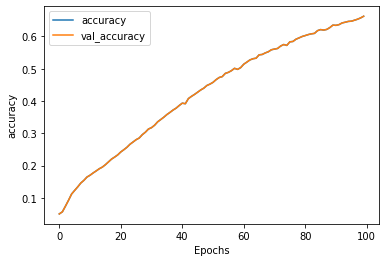

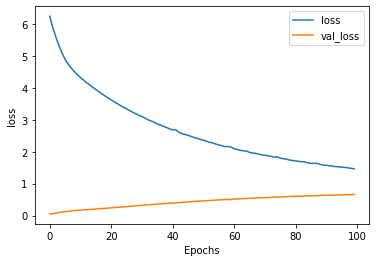

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['accuracy'])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [0]:
model.save("test.h5")


In [0]:
seed_text = "me gusta la vida"
next_words = 50
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    token_list = token_list.reshape([1,1,max_sequence_len-1])
    predicted = np.argmax(model.predict(token_list, verbose=1)[0])
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

In [0]:
print(seed_text)